In [1]:
import pandas as pd
data = pd.read_csv('/content/Car Evaluation.csv', low_memory=False)
data.head()

,buying price,maintenance cost,number of doors,number of persons,luggage boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacceptable
1,vhigh,vhigh,2,2,small,med,unacceptable
2,vhigh,vhigh,2,2,small,high,unacceptable
3,vhigh,vhigh,2,2,med,low,unacceptable
4,vhigh,vhigh,2,2,med,med,unacceptable


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Convert the 'decision' column: acceptable = 1, unacceptable = 0
data['decision'] = data['decision'].apply(lambda x: 1 if x == 'acceptable' else 0)

# Convert other categorical columns to numerical data using pd.get_dummies
data = pd.get_dummies(data, drop_first=True)

# Display the first few rows of the transformed dataset
print(data.head())

   decision  buying price_low  buying price_med  buying price_vhigh  \
0         0             False             False                True   
1         0             False             False                True   
2         0             False             False                True   
3         0             False             False                True   
4         0             False             False                True   

   maintenance cost_low  maintenance cost_med  maintenance cost_vhigh  \
0                 False                 False                    True   
1                 False                 False                    True   
2                 False                 False                    True   
3                 False                 False                    True   
4                 False                 False                    True   

   number of doors_3  number of doors_4  number of doors_5more  \
0              False              False                  False   
1 

In [4]:
# Split the data into training and testing sets
X = data.drop('decision', axis=1)
y = data['decision']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict the values
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Display the coefficients
print(pd.DataFrame(log_reg.coef_, columns=X.columns))

   buying price_low  buying price_med  buying price_vhigh  \
0         -0.437091          0.052327           -0.753111   

   maintenance cost_low  maintenance cost_med  maintenance cost_vhigh  \
0             -0.318367              0.355681               -0.631895   

   number of doors_3  number of doors_4  number of doors_5more  \
0           0.482751           0.613744               0.605615   

   number of persons_4  number of persons_more  luggage boot_med  \
0              3.74772                3.725572         -0.072464   

   luggage boot_small  safety_low  safety_med  
0           -0.620503    -4.50456    -0.36074  


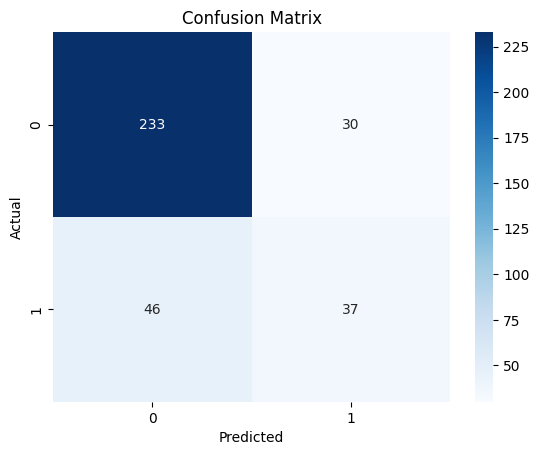

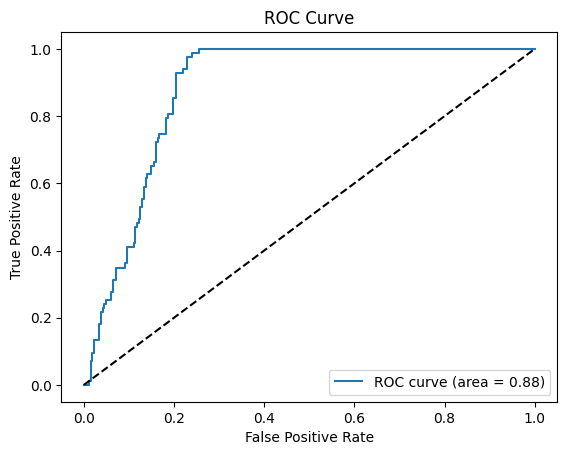

In [5]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [6]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy(Logistic Regression): {accuracy:.2f}')
# Calculate precision, recall, and F1 score for logistic regression
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision (Logistic Regression): {precision:.2f}')
print(f'Recall (Logistic Regression): {recall:.2f}')
print(f'F1 Score (Logistic Regression): {f1:.2f}')

Accuracy(Logistic Regression): 0.78
Precision (Logistic Regression): 0.55
Recall (Logistic Regression): 0.45
F1 Score (Logistic Regression): 0.49


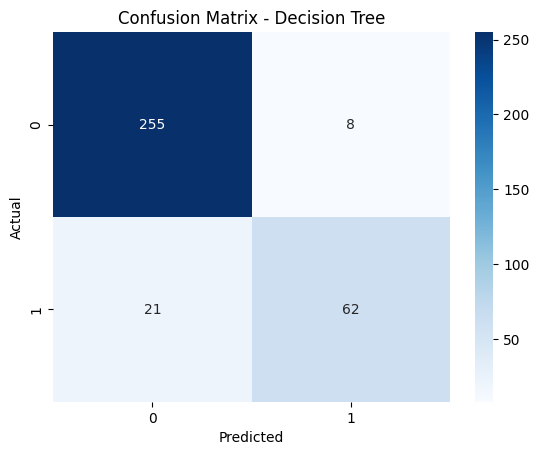

Accuracy (Decision Tree): 0.92


In [7]:
# Fit the decision tree model
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Predict the values
y_tree_pred = tree_clf.predict(X_test)

# Confusion matrix for decision tree
conf_matrix_tree = confusion_matrix(y_test, y_tree_pred)
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy for decision tree
accuracy_tree = accuracy_score(y_test, y_tree_pred)
print(f'Accuracy (Decision Tree): {accuracy_tree:.2f}')

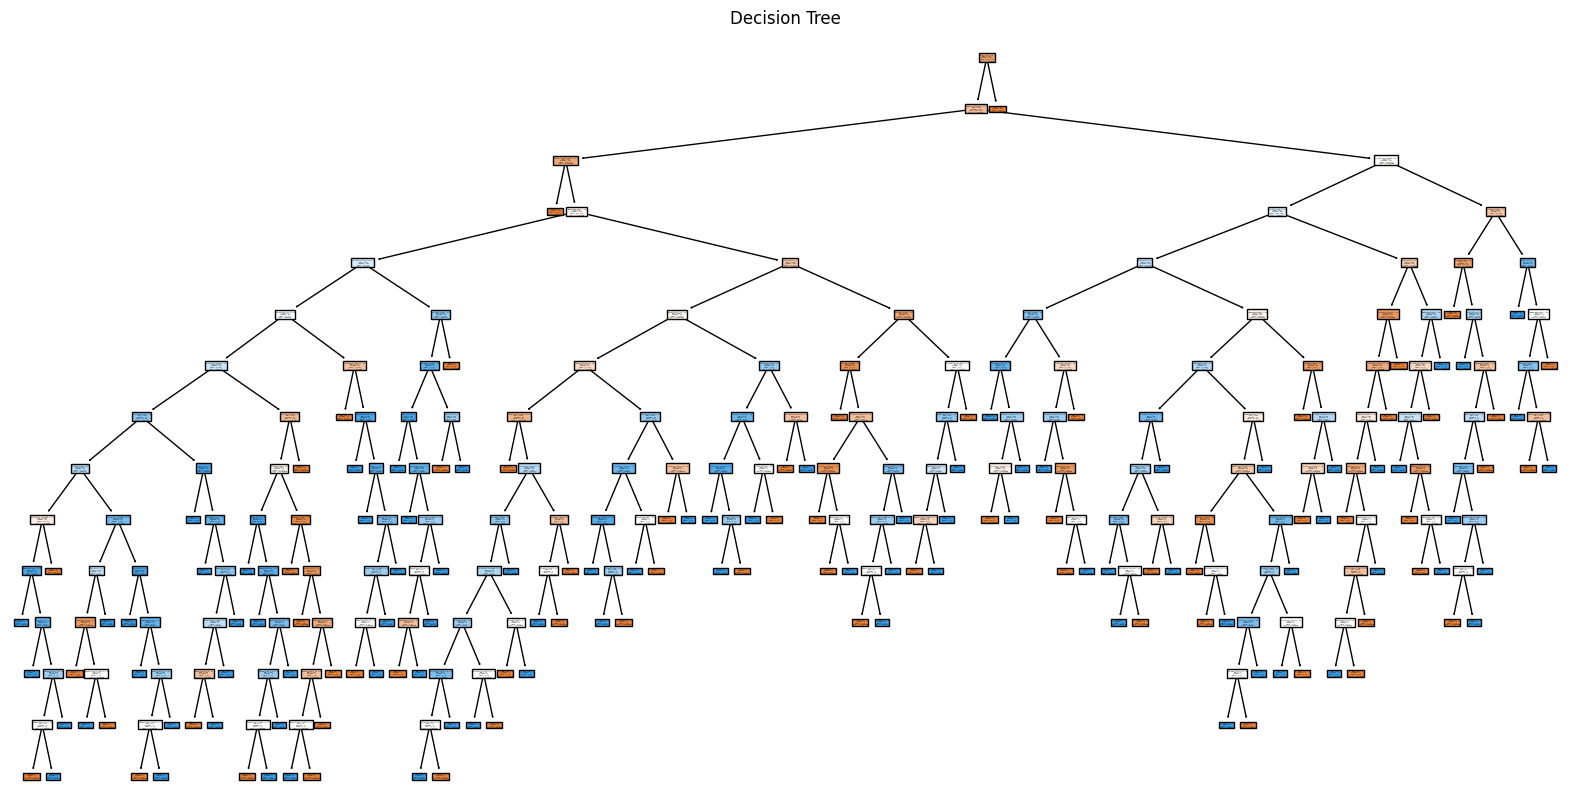

In [8]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_clf, filled=True, feature_names=X.columns, class_names=['Unacceptable', 'Acceptable'])
plt.title('Decision Tree')
plt.show()

In [9]:
print(f'Accuracy(Logistic Regression): {accuracy:.2f}')
print(f'Accuracy (Decision Tree): {accuracy_tree:.2f}')

Accuracy(Logistic Regression): 0.78
Accuracy (Decision Tree): 0.92
